In [3]:
import pandas as pd

In [4]:
tr = pd.read_csv("input/train.csv")
te = pd.read_csv("input/test.csv")

In [5]:
tr.shape

(614, 13)

In [6]:
te.shape

(367, 12)

In [7]:
tr.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
tr.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
tr_c = tr
te_c = te

In [10]:
all_data = tr_c.append(te_c)

In [11]:
all = all_data.dropna(axis=0,inplace=False)

In [12]:
target = "Loan_Status"
id = "Loan_ID"
num_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
cat_columns = [c for c in tr_c.columns if (c not in [*num_columns,target,id])]

In [13]:
all_nData = all[num_columns]

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox
%matplotlib inline

In [15]:
all_nData.skew()

ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
dtype: float64

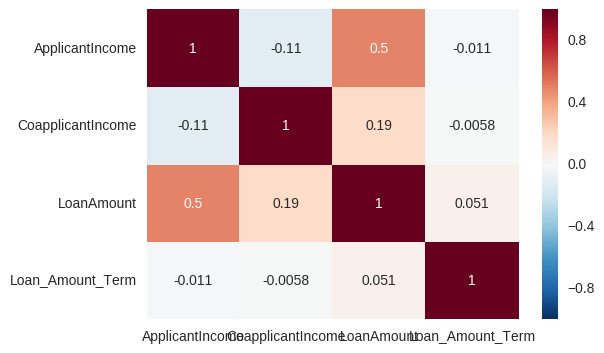

In [16]:
sns.heatmap(all_nData.corr(),annot=True)

In [17]:
cat_columns.append(target)

In [18]:
all_cData = pd.DataFrame()
for c in cat_columns:
    all_cData[c] = pd.factorize(all[c])[0]

In [19]:
import scipy.stats as scs


def categories(series):
    return range(int(series.min()), int(series.max()) + 1)


def chi_square_of_df_cols(df, col1, col2,full=False):
    df_col1, df_col2 = df[col1], df[col2]

    result = [[sum((df_col1 == cat1) & (df_col2 == cat2))
               for cat2 in categories(df_col2)]
              for cat1 in categories(df_col1)]

    g, p, dof, expctd = scs.chi2_contingency(result)
    if full:
        return g, p, dof, expctd
    return p


print(chi_square_of_df_cols(all_cData, 'Gender', 'Married'))

5.03882393138e-14


In [20]:
from itertools import combinations
all_cat_cols = combinations(cat_columns,2)

In [21]:
cat_corr_matrix = pd.DataFrame(columns=["col1","col2","val"])
for c1,c2 in all_cat_cols:
    #print(c1)
    cat_corr_matrix.loc[len(cat_corr_matrix)] =  [c1,c2,chi_square_of_df_cols(all_cData, c1, c2)]

cat_corr_matrix.sort("val",ascending=False,inplace=True)

/home/achal/.local/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [22]:
cat_corr_matrix

,col1,col2,val
18,Education,Self_Employed,9.572250e-01
8,Married,Education,9.340109e-01
3,Gender,Self_Employed,9.105659e-01
13,Dependents,Education,8.867223e-01
9,Married,Self_Employed,8.378395e-01
4,Gender,Credit_History,7.465614e-01
22,Self_Employed,Credit_History,7.424642e-01
11,Married,Property_Area,6.747384e-01
10,Married,Credit_History,6.156330e-01
25,Credit_History,Property_Area,5.949043e-01


In [23]:
all_data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

In [24]:
all_data[all_data.Married.isnull()]

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
104,3816,754.0,1.0,NaN,Graduate,Male,160.0,360.0,LP001357,Y,NaN,Urban,No
228,4758,0.0,1.0,NaN,Graduate,Male,158.0,480.0,LP001760,Y,NaN,Semiurban,No
435,10047,0.0,1.0,NaN,Graduate,Female,NaN,240.0,LP002393,Y,NaN,Semiurban,No


In [25]:
all_data[((all_data.Gender == "Female") & (all_data.Married == "No"))].shape

(124, 13)

In [26]:
all_data.loc[((all_data.Gender == "Male") & (all_data.Married.isnull())),"Married"] = "Yes"
all_data.loc[((all_data.Gender == "Female") & (all_data.Married.isnull())),"Married"] = "No"

In [27]:
all_data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         55
dtype: int64

In [28]:
all_data.loc[((all_data.Married == "Yes") & (all_data.Gender.isnull())),"Gender"] = "Male"
all_data.loc[((all_data.Married == "No") & (all_data.Gender.isnull())),"Gender"] = "Female"

In [29]:
all_data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                 0
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         55
dtype: int64

In [30]:
test = all_data.loc[all_data.Dependents.isnull(),["Married","Gender","Dependents"]]
train = all_data.loc[~all_data.Dependents.isnull(),["Married","Gender","Dependents"]]

In [31]:
all_data.loc[((all_data.Loan_Status == "N") & (all_data.Credit_History.isnull())),"Credit_History"] = 0.0
all_data.loc[((all_data.Loan_Status == "Y") & (all_data.Credit_History.isnull())),"Credit_History"] = 1.0
all_data.Credit_History.fillna(1.0,inplace=True)

In [32]:
dep_miss_index = all_data[all_data["Dependents"].isnull()].index
dep_miss_index

Int64Index([102, 104, 120, 226, 228, 293, 301, 332, 335, 346, 355, 435, 517,
            571, 597,  46,  70, 111, 138, 202, 247, 251, 265, 302, 312],
           dtype='int64')

In [33]:
all_data["Dependents"] = all_data.groupby(["Married","Gender","Property_Area"]).Dependents.transform(lambda x: x.fillna(x.value_counts().idxmax()))

In [34]:
all_data[all_data["Dependents"].isnull()].index

Int64Index([], dtype='int64')

In [35]:
all_data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         55
dtype: int64

In [36]:
all_data.Credit_History.value_counts()

1.0    820
0.0    161
Name: Credit_History, dtype: int64

In [37]:
all_clean = all_data.dropna(axis=0)

In [38]:
treatment1 = all_clean.loc[(all_clean.Married == "Yes"),"Loan_Amount_Term"]
treatment2 = all_clean.loc[(all_clean.Married != "Yes"),"Loan_Amount_Term"]

In [39]:
from scipy import stats  
      
f_val, p_val = stats.f_oneway(treatment1, treatment2)  
  
print("One-way ANOVA P =", p_val  )

One-way ANOVA P = 0.0132068817885


In [40]:
all_clean.Education.value_counts()

Graduate        433
Not Graduate    115
Name: Education, dtype: int64

In [41]:
all_data[all_data["LoanAmount"].isnull()].index

Int64Index([  0,  35,  63,  81,  95, 102, 103, 113, 127, 202, 284, 305, 322,
            338, 387, 435, 437, 479, 524, 550, 551, 605,  78, 101, 188, 247,
            289],
           dtype='int64')

In [42]:
all_data["LoanAmount"] = all_data.groupby("Education").LoanAmount.transform(lambda x: x.fillna(x.mean()))

In [43]:
all_data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         55
dtype: int64

In [44]:
all_data["Loan_Amount_Term"] = all_data.groupby("Married").Loan_Amount_Term.transform(lambda x: x.fillna(x.mean()))

In [45]:
all_data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         55
dtype: int64

## Loan Status Vs continuous variables

In [57]:
treatment1 = all_clean.loc[(all_clean.Loan_Status == "Y"),"CoapplicantIncome"]
treatment2 = all_clean.loc[(all_clean.Loan_Status != "Y"),"CoapplicantIncome"]

In [58]:
from scipy import stats  
      
f_val, p_val = stats.f_oneway(treatment1, treatment2)  
  
print("One-way ANOVA P =", p_val  )

One-way ANOVA P = 0.299645793315


## LDA to predict cat vars from cont vars

In [425]:
train = all_data.dropna(axis=0)
test = all_data[all_data.Self_Employed.isnull()]

In [426]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(train[["LoanAmount","Loan_Amount_Term"]],train["Self_Employed"])
se_missed = model.predict(test[["LoanAmount","Loan_Amount_Term"]])
all_data.Self_Employed.value_counts()

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [427]:
all_data.loc[all_data.Self_Employed.isnull(),"Self_Employed"] = se_missed

ValueError: Must have equal len keys and value when setting with an iterable

In [446]:
all_data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents            25
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
dtype: int64

## Dependents

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        29
Dependents            25
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
dtype: int64